# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


TEST_TRAIN_CONST  = 0.34
RANDOM_STATE = 40
N_ESTIMATOR = 4000


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Load train data
df_train = pd.read_csv("df_train.csv", index_col=0)

In [3]:
#Brief view of data
df_train.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Madrid_temp_max  \
0           1.000000                 0.0  ...       265.938000   
1           1.000000                 0.0  ...       266.386667   
2           1.000000                 0.0  ...       272.708667   
3           1.000000                 0.0  ...       281.895219   
4           0.333333                 0.0  ...       280.678437   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0      281.013000       269.338615   269.338615          281.013000   
1      280.561667       270.376000   270.376000          280.561667   
2      281.583667       275.027229   275.027229          281.583667   
3      283.434104       281.135063   281.135063          283.434104   
4      284.213167       282.252063   282.252063          284.213167   

   Bilbao_temp_max Seville_temp_min  Madrid_temp  Madrid_temp_min  \
0       269.338615       274.254667   265.938000       265.938000   
1       270.376000       274.945000   266.386667       266.386667   
2       275.027229       278.792000   272.708667       272.708667   
3       281.135063       285.394000   281.895219       281.895219   
4       282.252063       285.513719   280.678437       280.678437   

   load_shortfall_3h  
0        6715.666667  
1        4171.666667  
2        4274.666667  
3        5075.666667  
4        6620.666667  

[5 rows x 48 columns]

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


#### Univariate Non-Graphical Analysis
For this analysis, we are going to view dataset on the below checks:  \
    i.  Check for the presence of *null* values  \
    ii. Descriptive statistical values *mean, std, minimum, quatiles, maximum, and kurtosis*  
    iii. Dataset data types
    

In [4]:
# Check for the presence of null values
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [5]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [6]:
# look at data statistics
df_train.describe().T

count          mean           std          min  \
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.000000     75.000000  1.000000e+02  
Bilbao_wind_speed        0.666667      1.000000      2.666667  1.266667e+01  
Seville_clouds_all       0.000000      0

In [7]:
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

### Univariate graphical inspection of data
For this analysis, we view the individual colunms using histogram plot.

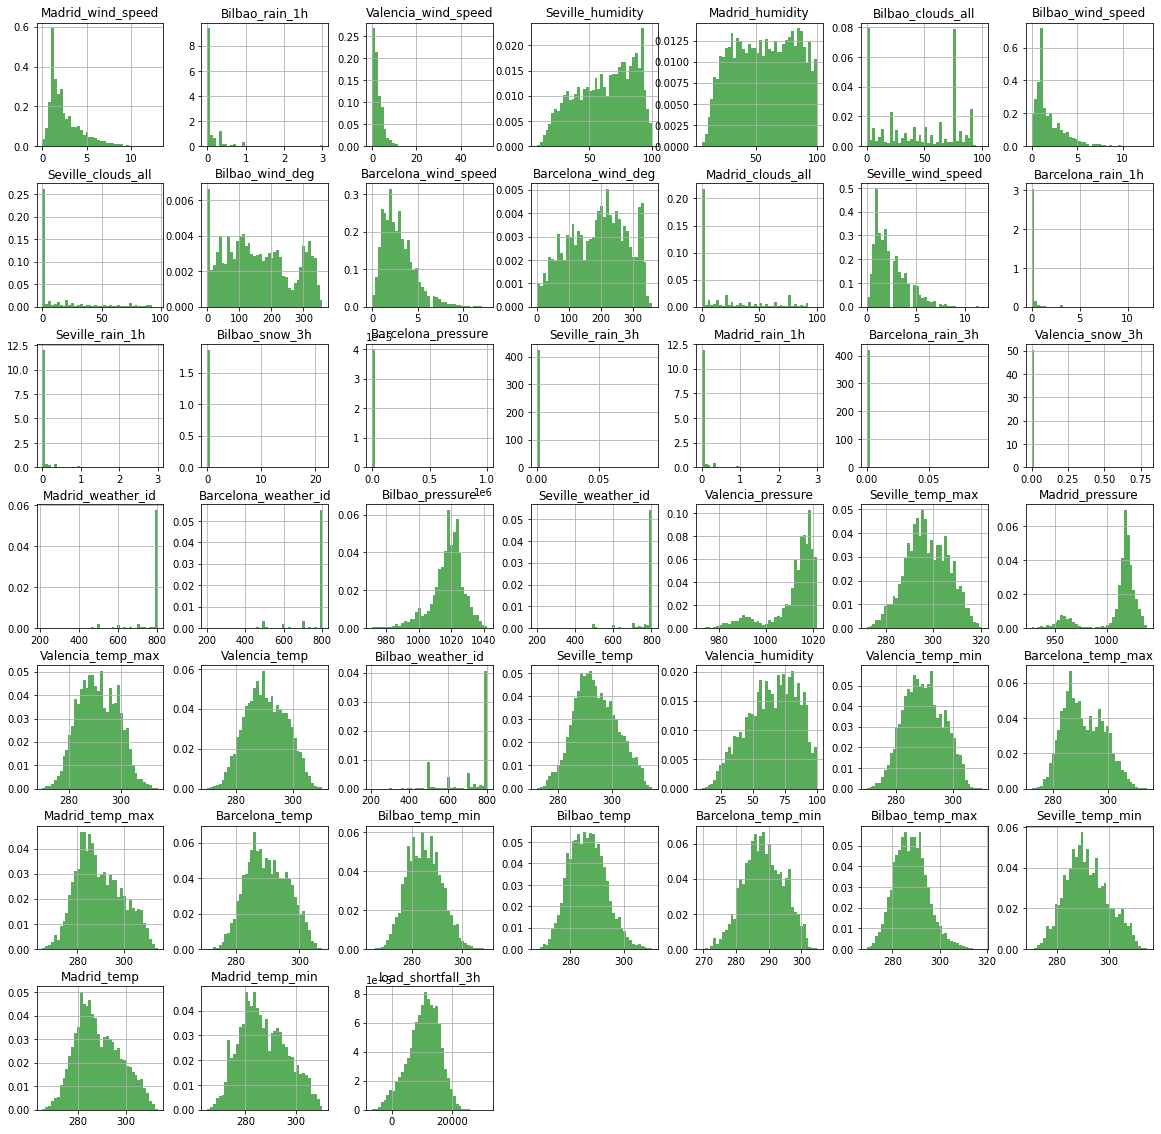

In [8]:
#plot of histogram of features
features = [col for col in df_train.columns if col not in ['time']]
features
df_train[features].hist(figsize=(20,20), bins=40, density=True, facecolor='g', alpha=0.65); 

### Multivariate graphical inspection of data
For this analysis, we try to visualize what the correlation among the features looks like, using a correlation heatmap. Also, we view the individual features relationship with the concerned dependant using a scatter plot.

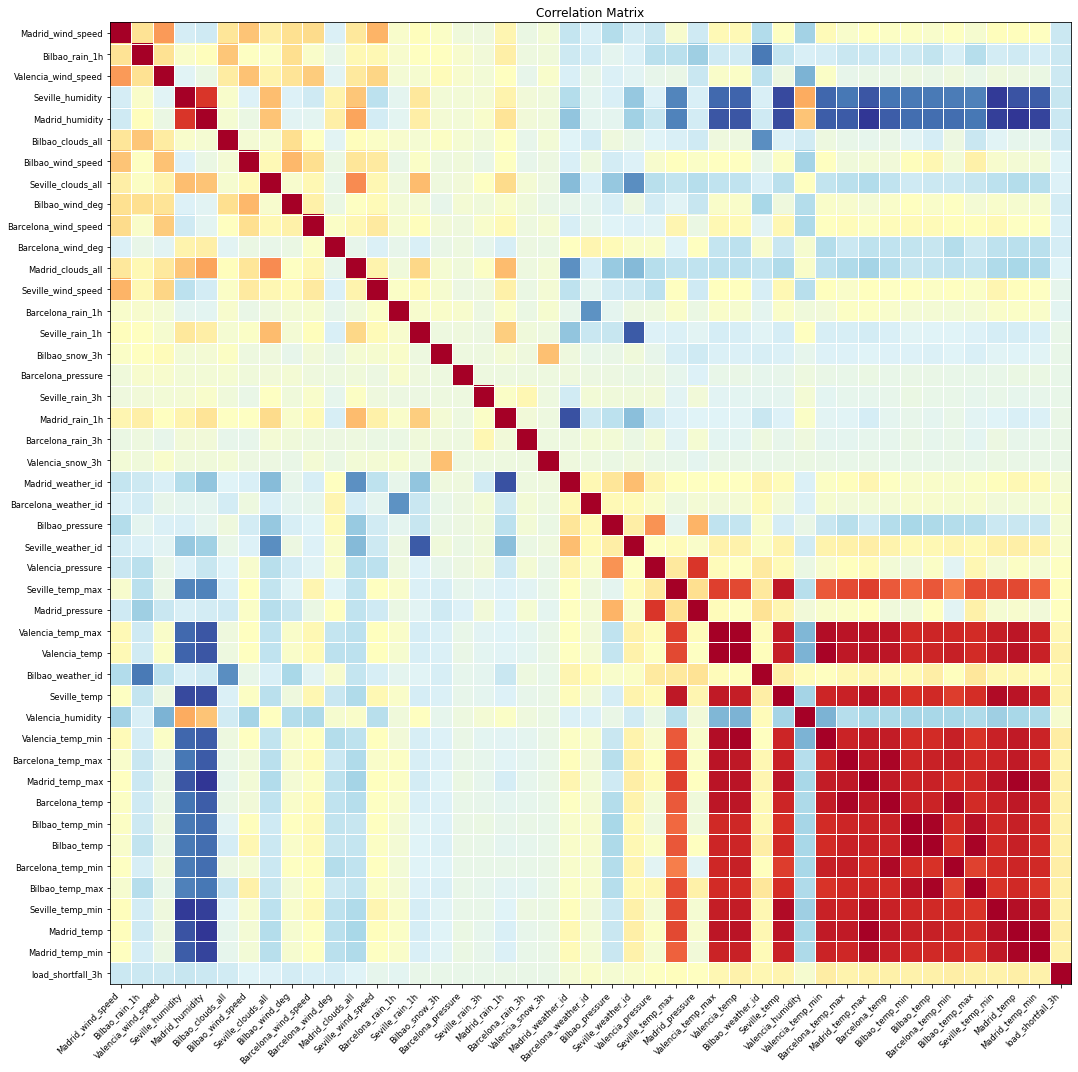

In [9]:
# evaluate correlation
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

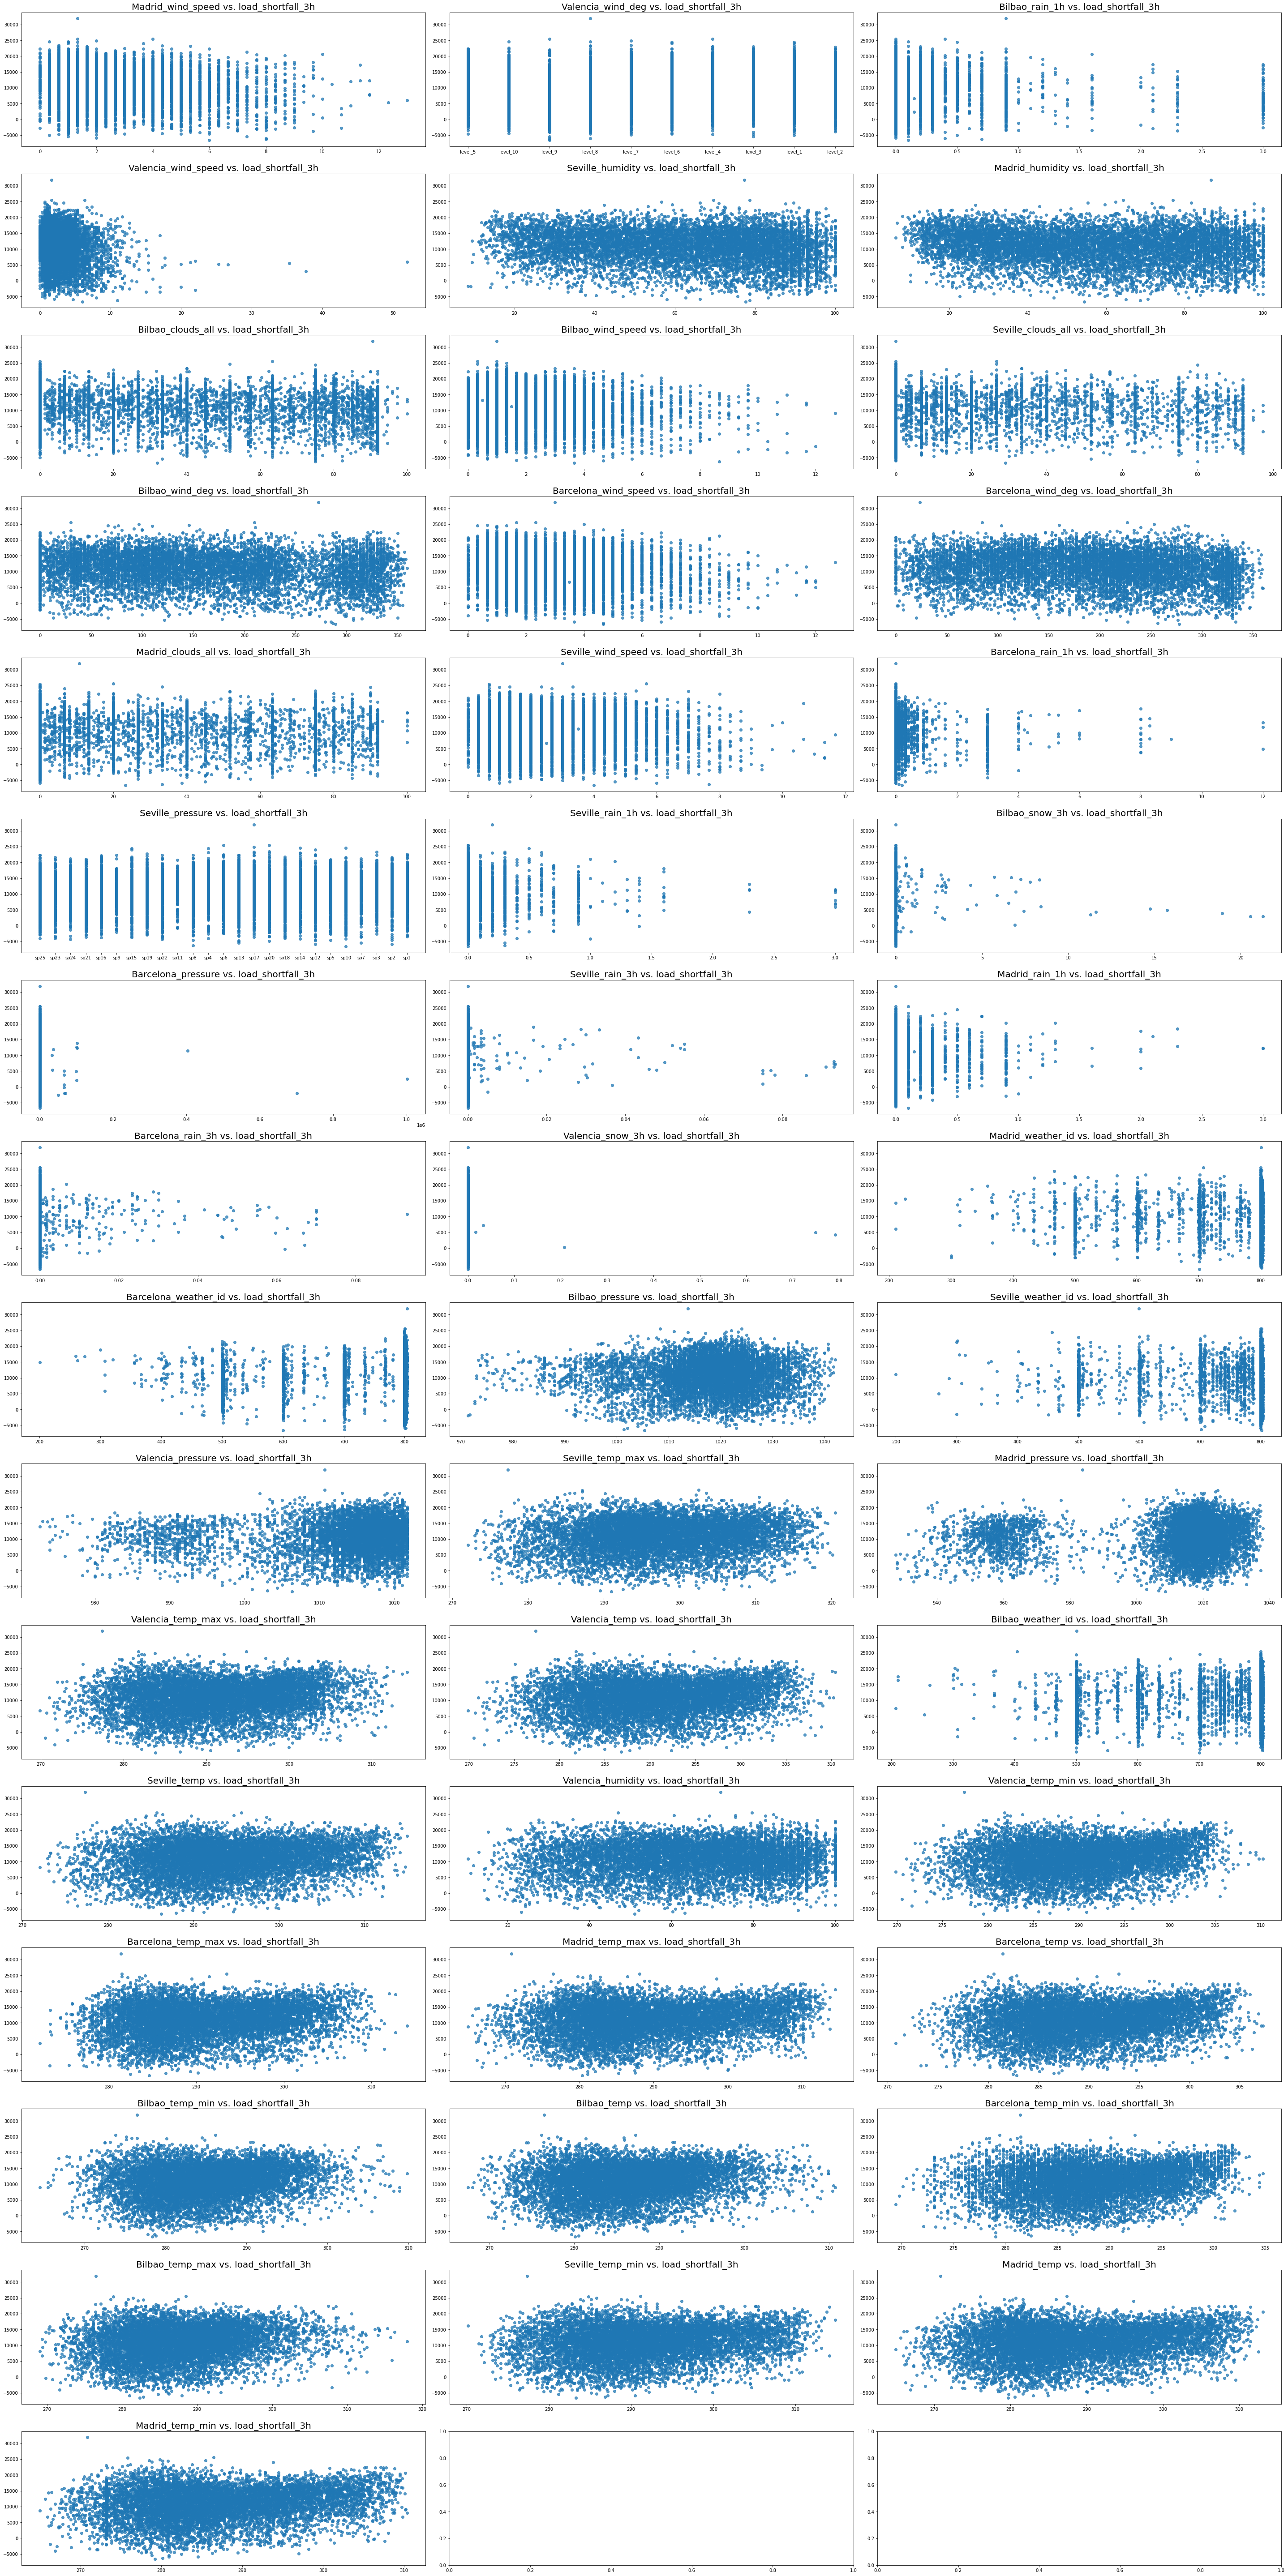

In [10]:
fig, axs = plt.subplots(16,3, figsize=(40,80),)
fig.subplots_adjust(hspace = 0.8, wspace=.4)
axs = axs.ravel()

for index, col in enumerate(df_train.columns):
    if col not in ['time', 'load_shortfall_3h'] :
        axs[index-1].set_title("{} vs. load_shortfall_3h".format(col),fontsize=20)
        axs[index-1].scatter(x=df_train[col],y=df_train['load_shortfall_3h'],color='tab:blue',alpha=0.75)

fig.tight_layout(pad=1)

#### Summary of EDA result
    i.   There are 2068 null values in the *Valencia_pressure* column
    ii.  There are three colunms ('time','Seville_pressure','Valencia_wind_deg') with          
         'O' dtype
    iii. The columns 'Barcelona_rain_1h','Seville_rain_1h','Bilbao_snow_3h', 
         'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',     
         and 'Valencia_snow_3h' have high high kurtosis values.
    iv.  The temperature values are highly correlated.
    v.   None of the feature showed any sign of linearity with the dependant.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### List of activities
    i.   Replace missing data in features
    ii.  Replace outliers
    iii. Convert object data-types to numeric datatype 
    iv.  Convert time feature from object type to datatime type
    v.   Create new features from the time feature
    vi.  Standardization of features
    vii. Remove features

##### i) Replace missing values
The proportion of null values in the Valencia_pressure column is around 23% of the total row count, for now, we may consider replacing these missing values with the average value for the entire colunm. The link below is a guide.
<a href='https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/'>How to handle missing values</a>

    For this operation, we write a function called check_null, which checks all the columns in a dataframe for null values, and calls the replace_null_with_mean function on any        column identified with null value.
    The replace_null_with_mean function takes in a series with null value, and               returns a new series void of null.

In [11]:
#function replacee_null_with_mean replaces the null values in a dataframe column with its mean value    

def replace_null_with_mean(sr):
    new_sr = sr.copy()
    mean_val = sr.mean()
    new_sr = new_sr.fillna(mean_val)
    
    return new_sr

In [12]:
def check_null(df):
    new_df = df.copy()
    cols = new_df.columns
    for col in cols:
        if new_df[col].isnull().sum() > 0 :
            new_df[col] = replace_null_with_mean(new_df[col])
            
    return new_df        

*Replace the null values in column Valencia_pressure with its mean value*

In [68]:
improved_df = check_null(df_train)
improved_df.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [69]:
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [77]:
# improved_df.corr()

#### vi) Feature Selection
    For this operation, we make use of the Recursive Feature Selection(RFE) from sklearn.
    to achieve this, we feed a RandomForestRegressor into the RFE with our choice of hyperparameters and input an integer for, which is our choice of numbers of features.

In [71]:
#function drop_columns accepts a dataframe, a turple of columns that should be droped, and returns a new dataframe

def remove_features(df, cols):
    df_cols = df.columns
    remove_col = [col for col in cols if col in df_cols]
    new_df = df.drop(columns = remove_col, axis = 1)
    return new_df

In [78]:
# Returns columns with specidied correlation value
# def get_high_cor_feat(df, corr_val):
#     corr_df = df.corr()
#     cols = corr_df.columns
#     col_arr = []
    
#     def eval_corr(label, data):
#         pass_col = [col for col in cols if ((abs(data[col]) >= corr_val) & (col != label ) )]
#         return pass_col

#     for label, data in corr_df.iterrows():
#         arr = eval_corr(label, data)
#         col_arr = col_arr + arr
    
#     return list(set(col_arr))

In [80]:
# high_cor_feat = get_high_cor_feat(improved_df.drop('time',axis=1), 0.7)
# high_cor_feat

In [16]:
# Remove columns that will generally not affect the response from domain research of renewable energy 

features = ['Madrid_weather_id', 'Barcelona_weather_id','Seville_weather_id','Bilbao_weather_id',
             'Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all','Madrid_temp_min', 
            'Seville_temp_min','Bilbao_temp_max','Barcelona_temp_min','Bilbao_temp_min','Madrid_temp_max',
            'Barcelona_temp_max','Valencia_temp_min','Valencia_temp_max','Seville_temp_max',
            'Barcelona_pressure','Valencia_snow_3h','Seville_rain_3h','Bilbao_snow_3h']
            
improved_df = remove_features(improved_df, features)
improved_df.shape



(8763, 27)

##### ii) Outliers 
There are three ways we can handle outliers:
    i) remove the rows where these values occured
    ii) remove the columns entirely 
    iii) replace with the median value
Which ever approach taken, we must first agree on a method of identifying outliers in our data set(Interquartile Range)

In [17]:
# The id_outliers takes in a series, uses the interquartile range to identify outliers.
# it returns a turple ( list of outliers, and median)
def id_outliers(sr):
    data = sr.values
    q25 = sr.quantile(.25)
    q75 = sr.quantile(.75)
    q50 = sr.mean()
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    
    return (outliers, q50 )

def handle_outliers(sr, outliers, value):
    sr_copy = sr.copy()
    sr_copy = sr_copy.replace(outliers, value)
    
    return sr_copy
    
def treat_outliers(df):
    # create a copy of the original df
    df_copy = df.copy()
    cols = df_copy.columns
    
    # Identify outliers in each colunm of the copy
    for col in cols:
        # Exclude the time colunm while handling the outliers
        if  ((df_copy[col].dtype != 'O') & (col != 'load_shortfall_3h')):
            outliers, median = id_outliers(df_copy[col])
            # handle the outlier by calling any of the handle method
            df_copy[col] = handle_outliers(df_copy[col], outliers, median)
    
    
    return df_copy

In [18]:
## handle Outliers in Data set
improved_df = treat_outliers(improved_df)
improved_df.kurtosis()

Madrid_wind_speed        0.377352
Bilbao_rain_1h          -0.332138
Valencia_wind_speed      0.409524
Seville_humidity        -1.017983
Madrid_humidity         -1.167537
Bilbao_wind_speed        0.346415
Bilbao_wind_deg         -1.083530
Barcelona_wind_speed    -0.100551
Barcelona_wind_deg      -0.959160
Seville_wind_speed      -0.011247
Barcelona_rain_1h        1.931868
Seville_rain_1h          5.372852
Madrid_rain_1h           4.564620
Barcelona_rain_3h       34.342353
Bilbao_pressure          0.271683
Valencia_pressure       -0.448465
Madrid_pressure         -0.156444
Valencia_temp           -0.643793
Seville_temp            -0.504132
Valencia_humidity       -0.734345
Barcelona_temp          -0.696555
Bilbao_temp             -0.349158
Madrid_temp             -0.612299
load_shortfall_3h       -0.118999
dtype: float64

##### iii) Convert time feature to datetime data type
    The convert_time function takes in a dataframe and a time column and return the same dataframe with its' time column converted to datetime data-type

In [19]:
# convert time col to pandas datetime type
def conver_time(df, col):
    return pd.to_datetime(df[col])


In [20]:
improved_df['time'] = conver_time(improved_df, 'time')
improved_df['time'].dtype

dtype('<M8[ns]')

##### iv) Convert object type features to numerical type
    The object_converter takes in a dataframe, check for feature with object data-types, and replace these features with a numerical value feature, with the aid of pandas get_dummies method. It returns a new dataframe after this operation.

In [21]:
# Converts columns with object type to numeric data type, and drops the first column
def object_converter(df):
    new_df = df.copy()
    cols = df.columns
    object_type = [col for col in cols if df[col].dtype == 'O']
    new_df = pd.get_dummies(df, columns= object_type,drop_first=True)
    return new_df

In [22]:
improved_df_2 = object_converter(improved_df)
improved_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   Madrid_wind_speed           8763 non-null   float64       
 2   Bilbao_rain_1h              8763 non-null   float64       
 3   Valencia_wind_speed         8763 non-null   float64       
 4   Seville_humidity            8763 non-null   float64       
 5   Madrid_humidity             8763 non-null   float64       
 6   Bilbao_wind_speed           8763 non-null   float64       
 7   Bilbao_wind_deg             8763 non-null   float64       
 8   Barcelona_wind_speed        8763 non-null   float64       
 9   Barcelona_wind_deg          8763 non-null   float64       
 10  Seville_wind_speed          8763 non-null   float64       
 11  Barcelona_rain_1h           8763 non-null   float64     

##### v) Convert time feature to numeric data-type
    The split_datetime_col accepts a dataframe and a time colunm, which it uses to create (year,month,week,day and hour) feature in a new dataframe which is returned

In [23]:
#Split datetime columns to year, month, week, day and hour columns

def split_datetime_col(df, col):  
    new_df = df.copy()
    new_df['Year'] = new_df[col].dt.year
    new_df['Month'] = new_df[col].dt.month
    new_df['Week'] = new_df[col].dt.week
    new_df['Day'] = new_df[col].dt.day
    new_df['Hour'] = new_df[col].dt.hour
    return new_df


In [24]:
# Create new features for the time feature
improved_df_2 = split_datetime_col(improved_df_2, 'time')
improved_df_2.head()

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2015-01-01 03:00:00           0.666667             0.0             0.666667   
1 2015-01-01 06:00:00           0.333333             0.0             1.666667   
2 2015-01-01 09:00:00           1.000000             0.0             1.000000   
3 2015-01-01 12:00:00           1.000000             0.0             1.000000   
4 2015-01-01 15:00:00           1.000000             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_wind_speed  Bilbao_wind_deg  \
0         74.333333        64.000000           1.000000       223.333333   
1         78.333333        64.666667           1.000000       221.000000   
2         71.333333        64.333333           1.000000       214.333333   
3         65.333333        56.333333           1.000000       199.666667   
4         59.000000        57.000000           0.333333       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  ...  Seville_pressure_sp5  \
0              6.333333           42.666667  ...                     0   
1              4.000000          139.000000  ...                     0   
2              2.000000          326.000000  ...                     0   
3              2.333333          273.000000  ...                     0   
4              4.333333          260.000000  ...                     0   

   Seville_pressure_sp6  Seville_pressure_sp7  Seville_pressure_sp8  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Seville_pressure_sp9  Year  Month  Week  Day  Hour  
0                     0  2015      1     1    1     3  
1                     0  2015      1     1    1     6  
2                     0  2015      1     1    1     9  
3                     0  2015      1     1    1    12  
4                     0  2015      1     1    1    15  

[5 rows x 63 columns]

##### vi) Standardiztion
    Considering the fact that we have different features with different range of values, it is imperative that we standardise all these features.
    The standadize_data takes in a dataframe and an array of columns to exclude in the standardize operation. It uses sklearn StandardScaler for this operation. It then returns a new standardized dataset.
    

In [25]:
# Takes in a dataframe, and list of columns to exclude during standadization of data 
def standadize_data(df, exclude):
    #store origin column order
    original_columns = df.columns
    df_copy = df.copy()
    df_copy = df_copy.drop(exclude, axis =1)
    
    #store the columns of the remaining columns
    std_columns = df_copy.columns
    
    # create scaler object
    scaler = StandardScaler()
    
    # create scaled version of the predictors (there is no need to scale the response)
    df_copy_scaled = scaler.fit_transform(df_copy)
    
    # convert the scaled predictor values into a dataframe
    df_copy_scaled = pd.DataFrame(df_copy_scaled,columns=std_columns)
    
    # return back the columns excluded from standardization
    for col in exclude:
        df_copy_scaled[col] = df[col]
        
    # reorder the columns to its original form
    df_copy_scaled = df_copy_scaled[original_columns]
    
    return df_copy_scaled
    

In [26]:
# Apply standardization
improved_df_2_standard = standadize_data(improved_df_2, ['time', 'load_shortfall_3h'])
improved_df_2_standard.head() 

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2015-01-01 03:00:00          -1.045339       -0.626574            -0.969082   
1 2015-01-01 06:00:00          -1.268500       -0.626574            -0.373797   
2 2015-01-01 09:00:00          -0.822179       -0.626574            -0.770653   
3 2015-01-01 12:00:00          -0.822179       -0.626574            -0.770653   
4 2015-01-01 15:00:00          -0.822179       -0.626574            -0.770653   

   Seville_humidity  Madrid_humidity  Bilbao_wind_speed  Bilbao_wind_deg  \
0          0.516117         0.270621          -0.497368         0.630823   
1          0.692953         0.298017          -0.497368         0.607959   
2          0.383491         0.284319          -0.497368         0.542632   
3          0.118238        -0.044439          -0.497368         0.398912   
4         -0.161751        -0.017043          -1.026966         0.255192   

   Barcelona_wind_speed  Barcelona_wind_deg  ...  Seville_pressure_sp5  \
0              2.276755           -1.660205  ...             -0.210555   
1              0.793889           -0.578686  ...             -0.210555   
2             -0.477139            1.520733  ...             -0.210555   
3             -0.265301            0.925711  ...             -0.210555   
4              1.005727            0.779762  ...             -0.210555   

   Seville_pressure_sp6  Seville_pressure_sp7  Seville_pressure_sp8  \
0             -0.221833             -0.142332             -0.223808   
1             -0.221833             -0.142332             -0.223808   
2             -0.221833             -0.142332             -0.223808   
3             -0.221833             -0.142332             -0.223808   
4             -0.221833             -0.142332             -0.223808   

   Seville_pressure_sp9      Year     Month      Week       Day      Hour  
0             -0.146043 -1.226179 -1.602429 -1.709703 -1.675368 -1.090901  
1             -0.146043 -1.226179 -1.602429 -1.709703 -1.675368 -0.654451  
2             -0.146043 -1.226179 -1.602429 -1.709703 -1.675368 -0.218001  
3             -0.146043 -1.226179 -1.602429 -1.709703 -1.675368  0.218449  
4             -0.146043 -1.226179 -1.602429 -1.709703 -1.675368  0.654899  

[5 rows x 63 columns]

#### Spliting of data
    We shall proceed to split the dataset into two (training and validation). The training set will be used to train three different Regressor models (Linear, Lasso & Rainforest), while we use the validation set to review these models,and chose the best for the competition.

In [27]:
# split predictors and response
X = improved_df_2_standard.drop(['load_shortfall_3h','time'], axis=1)
y = improved_df_2_standard['load_shortfall_3h']
X.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Bilbao_pressure',
       'Valencia_pressure', 'Madrid_pressure', 'Valencia_temp', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp',
       'Valencia_wind_deg_level_10', 'Valencia_wind_deg_level_2',
       'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4',
       'Valencia_wind_deg_level_5', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_7', 'Valencia_wind_deg_level_8',
       'Valencia_wind_deg_level_9', 'Seville_pressure_sp10',
       'Seville_pressure_sp11', 'Seville_pressure_sp12',
       'Seville_pressure_sp13', 'Seville_pressure_sp14',
       'Seville_pressure_sp15', 'Seville_pressure_sp16',
       'S

##### Validation set
    The function create_val, splits the training data into two(Training & Validation). The major reason for doing this to to enable us confirm and compare how the models work internally before exposing to the main test data.
    The function recieves a dataframe/series and an integer, which it uses to divide the dataframe into two by indexing. it returns two new copy of dataframe.

In [28]:
#This is where we split the dataset into two(Train & Validattion)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size= TEST_TRAIN_CONST ,random_state=42)

In [81]:
print(f'Train data shape: {X_train.shape}  |  validation data shape: {X_val.shape}')

Train data shape: (5783, 61)  |  validation data shape: (2980, 61)


In [82]:
print(f'Test dependant shape: {y_train.shape}  |  Validation dependant shape: {y_val.shape}')

Test dependant shape: (5783,)  |  Validation dependant shape: (2980,)


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [31]:
# Reaturn the dependant feature for statsmodels.OLS medel
ols_X_train = X.copy()
ols_X_train['load_shortfall_3h'] = y
ols_X_train.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -1.045339       -0.626574            -0.969082          0.516117   
1          -1.268500       -0.626574            -0.373797          0.692953   
2          -0.822179       -0.626574            -0.770653          0.383491   
3          -0.822179       -0.626574            -0.770653          0.118238   
4          -0.822179       -0.626574            -0.770653         -0.161751   

   Madrid_humidity  Bilbao_wind_speed  Bilbao_wind_deg  Barcelona_wind_speed  \
0         0.270621          -0.497368         0.630823              2.276755   
1         0.298017          -0.497368         0.607959              0.793889   
2         0.284319          -0.497368         0.542632             -0.477139   
3        -0.044439          -0.497368         0.398912             -0.265301   
4        -0.017043          -1.026966         0.255192              1.005727   

   Barcelona_wind_deg  Seville_wind_speed  ...  Seville_pressure_sp6  \
0           -1.660205            0.694935  ...             -0.221833   
1           -0.578686            0.694935  ...             -0.221833   
2            1.520733            0.241440  ...             -0.221833   
3            0.925711            1.148429  ...             -0.221833   
4            0.779762            0.468187  ...             -0.221833   

   Seville_pressure_sp7  Seville_pressure_sp8  Seville_pressure_sp9      Year  \
0             -0.142332             -0.223808             -0.146043 -1.226179   
1             -0.142332             -0.223808             -0.146043 -1.226179   
2             -0.142332             -0.223808             -0.146043 -1.226179   
3             -0.142332             -0.223808             -0.146043 -1.226179   
4             -0.142332             -0.223808             -0.146043 -1.226179   

      Month      Week       Day      Hour  load_shortfall_3h  
0 -1.602429 -1.709703 -1.675368 -1.090901        6715.666667  
1 -1.602429 -1.709703 -1.675368 -0.654451        4171.666667  
2 -1.602429 -1.709703 -1.675368 -0.218001        4274.666667  
3 -1.602429 -1.709703 -1.675368  0.218449        5075.666667  
4 -1.602429 -1.709703 -1.675368  0.654899        6620.666667  

[5 rows x 62 columns]

### Fitting the model using `statsmodels.OLS`

We shall first, fit the model using statsmodels.ols, to enable us properly evaluate the appropriateness of the regression models we fit.

### Generating the regression string
We first generate a string of the form:

`y ~ X`

which is read as follows: "Regress y on X". 

#### Hence, we create targets and features dataset
To successfully achieve this, we first need to view the order of our columns, to confirm that it fits with the desired result

From the result seen above, its obvious that we have to reorder our data set.

In [32]:
formula_str = ols_X_train.columns[-1]+' ~ '+'+'.join(ols_X_train.columns[:-1])
formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Madrid_rain_1h+Barcelona_rain_3h+Bilbao_pressure+Valencia_pressure+Madrid_pressure+Valencia_temp+Seville_temp+Valencia_humidity+Barcelona_temp+Bilbao_temp+Madrid_temp+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_6+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp11+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp14+Seville_pressure_sp15+Seville_pressure_sp16+Seville_pressure_sp17+Seville_pressure_sp18+Seville_pressure_sp19+Seville_pressure_sp2+Seville_pressure_sp20+Seville_pressure_sp21+Seville_pressure_sp22+Seville_pressure_sp23+Seville_pressure_sp24+Seville_press

### Construct and fit the model
​
We now go ahead and fit our model. We use the `ols` or Ordinary Least Squares regression model from the `statsmodels` library to do this:  

In [33]:
import statsmodels.formula.api as sm
st_model=sm.ols(formula=formula_str, data=ols_X_train)

In [34]:
# fit and print the model
st_fitted = st_model.fit()
print(st_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     26.26
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          3.91e-268
Time:                        04:16:16   Log-Likelihood:                -86703.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8701   BIC:                         1.740e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the result above

#### `R-squared : 0.156:`
The R-squared value is very far from 1, which is a signed to show that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, it can also be inferred that some featore are not relevent to the model, and needs to be droped. However, is no warning about strong multicollinearity.


### Lasso model

In [35]:
# Create LASSO model object, setting alpha to 0.01
# Train the LASSO model

lasso_model = Lasso(alpha=0.01)

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_val)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_val,y_pred)))

RMSE: 4883.267369813505


### RandomForest model

In [83]:
# from sklearn.ensemble import RandomForestRegressor
# Our forest consists of 4000 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators = N_ESTIMATOR,random_state= RANDOM_STATE, n_jobs=-1)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=4000, n_jobs=-1, random_state=40)

#### Testing
To evaluate the performance of our model, we can report the mean square error or plot predicted output vs expected output.

In [84]:
#Testing
new_X_val = X_val.copy()
# Get predictions
y_pred = RF.predict(new_X_val)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_val,y_pred)))

RMSE: 3217.022445166254


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [39]:
#Load train data
df_test = pd.read_csv("df_test.csv", index_col=0)

In [40]:
 df_test.head()

time  Madrid_wind_speed Valencia_wind_deg  \
8763  2018-01-01 00:00:00           5.000000           level_8   
8764  2018-01-01 03:00:00           4.666667           level_8   
8765  2018-01-01 06:00:00           2.333333           level_7   
8766  2018-01-01 09:00:00           2.666667           level_7   
8767  2018-01-01 12:00:00           4.000000           level_7   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8763             0.0             5.000000         87.000000        71.333333   
8764             0.0             5.333333         89.000000        78.000000   
8765             0.0             5.000000         89.000000        89.666667   
8766             0.0             5.333333         93.333333        82.666667   
8767             0.0             8.666667         65.333333        64.000000   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  ...  \
8763          20.000000           3.000000            0.000000  ...   
8764           0.000000           3.666667            0.000000  ...   
8765           0.000000           2.333333            6.666667  ...   
8766          26.666667           5.666667            6.666667  ...   
8767          26.666667          10.666667            0.000000  ...   

      Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
8763          287.816667       280.816667      287.356667       276.150000   
8764          284.816667       280.483333      284.190000       277.816667   
8765          284.483333       276.483333      283.150000       276.816667   
8766          284.150000       277.150000      283.190000       279.150000   
8767          287.483333       281.150000      286.816667       281.816667   

      Bilbao_temp  Barcelona_temp_min Bilbao_temp_max  Seville_temp_min  \
8763   280.380000          286.816667      285.150000        283.150000   
8764   281.010000          283.483333      284.150000        281.150000   
8765   279.196667          281.816667      282.150000        280.483333   
8766   281.740000          282.150000      284.483333        279.150000   
8767   284.116667          286.150000      286.816667        284.483333   

      Madrid_temp  Madrid_temp_min  
8763   279.866667       279.150000  
8764   279.193333       278.150000  
8765   276.340000       276.150000  
8766   275.953333       274.483333  
8767   280.686667       280.150000  

[5 rows x 47 columns]

In [41]:
# look at data statistics
df_test['Valencia_pressure'].isna().sum()

454

In [42]:
clean_test_df = check_null(df_test)
clean_test_df['Valencia_pressure'].isna().sum()

0

In [43]:

clean_test_df = remove_features(clean_test_df, features)
clean_test_df.shape


(2920, 26)

In [44]:
clean_test_df = treat_outliers(clean_test_df)
clean_test_df.head()

time  Madrid_wind_speed Valencia_wind_deg  \
8763  2018-01-01 00:00:00           5.000000           level_8   
8764  2018-01-01 03:00:00           4.666667           level_8   
8765  2018-01-01 06:00:00           2.333333           level_7   
8766  2018-01-01 09:00:00           2.666667           level_7   
8767  2018-01-01 12:00:00           4.000000           level_7   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8763             0.0             5.000000         87.000000        71.333333   
8764             0.0             5.333333         89.000000        78.000000   
8765             0.0             5.000000         89.000000        89.666667   
8766             0.0             5.333333         93.333333        82.666667   
8767             0.0             3.012785         65.333333        64.000000   

      Bilbao_wind_speed  Bilbao_wind_deg  Barcelona_wind_speed  ...  \
8763           3.000000       193.333333              4.000000  ...   
8764           3.666667       143.333333              4.666667  ...   
8765           2.333333       130.000000              4.000000  ...   
8766           5.666667       196.666667              2.333333  ...   
8767           2.283562       233.333333              4.666667  ...   

      Barcelona_rain_3h  Bilbao_pressure  Valencia_pressure Madrid_pressure  \
8763                0.0      1025.666667        1013.148351     1030.000000   
8764                0.0      1026.666667        1013.148351     1030.333333   
8765                0.0      1025.333333        1013.148351     1030.666667   
8766                0.0      1025.000000        1013.148351     1032.333333   
8767                0.0      1022.333333        1013.148351     1032.333333   

      Valencia_temp  Seville_temp  Valencia_humidity  Barcelona_temp  \
8763     287.483333    283.673333          46.333333      287.356667   
8764     284.150000    281.673333          53.666667      284.190000   
8765     282.816667    280.613333          42.000000      283.150000   
8766     283.483333    279.936667          45.000000      283.190000   
8767     287.150000    285.570000          41.000000      286.816667   

      Bilbao_temp  Madrid_temp  
8763   280.380000   279.866667  
8764   281.010000   279.193333  
8765   279.196667   276.340000  
8766   281.740000   275.953333  
8767   284.116667   280.686667  

[5 rows x 26 columns]

In [45]:
clean_test_df['time'] = conver_time(clean_test_df, 'time')
clean_test_df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
8763 2018-01-01 00:00:00           5.000000           level_8             0.0   
8764 2018-01-01 03:00:00           4.666667           level_8             0.0   
8765 2018-01-01 06:00:00           2.333333           level_7             0.0   
8766 2018-01-01 09:00:00           2.666667           level_7             0.0   
8767 2018-01-01 12:00:00           4.000000           level_7             0.0   

      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8763             5.000000         87.000000        71.333333   
8764             5.333333         89.000000        78.000000   
8765             5.000000         89.000000        89.666667   
8766             5.333333         93.333333        82.666667   
8767             3.012785         65.333333        64.000000   

      Bilbao_wind_speed  Bilbao_wind_deg  Barcelona_wind_speed  ...  \
8763           3.000000       193.333333              4.000000  ...   
8764           3.666667       143.333333              4.666667  ...   
8765           2.333333       130.000000              4.000000  ...   
8766           5.666667       196.666667              2.333333  ...   
8767           2.283562       233.333333              4.666667  ...   

      Barcelona_rain_3h  Bilbao_pressure  Valencia_pressure Madrid_pressure  \
8763                0.0      1025.666667        1013.148351     1030.000000   
8764                0.0      1026.666667        1013.148351     1030.333333   
8765                0.0      1025.333333        1013.148351     1030.666667   
8766                0.0      1025.000000        1013.148351     1032.333333   
8767                0.0      1022.333333        1013.148351     1032.333333   

      Valencia_temp  Seville_temp  Valencia_humidity  Barcelona_temp  \
8763     287.483333    283.673333          46.333333      287.356667   
8764     284.150000    281.673333          53.666667      284.190000   
8765     282.816667    280.613333          42.000000      283.150000   
8766     283.483333    279.936667          45.000000      283.190000   
8767     287.150000    285.570000          41.000000      286.816667   

      Bilbao_temp  Madrid_temp  
8763   280.380000   279.866667  
8764   281.010000   279.193333  
8765   279.196667   276.340000  
8766   281.740000   275.953333  
8767   284.116667   280.686667  

[5 rows x 26 columns]

In [46]:
clean_test_df_copy = object_converter(clean_test_df)
clean_test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        2920 non-null   datetime64[ns]
 1   Madrid_wind_speed           2920 non-null   float64       
 2   Bilbao_rain_1h              2920 non-null   float64       
 3   Valencia_wind_speed         2920 non-null   float64       
 4   Seville_humidity            2920 non-null   float64       
 5   Madrid_humidity             2920 non-null   float64       
 6   Bilbao_wind_speed           2920 non-null   float64       
 7   Bilbao_wind_deg             2920 non-null   float64       
 8   Barcelona_wind_speed        2920 non-null   float64       
 9   Barcelona_wind_deg          2920 non-null   float64       
 10  Seville_wind_speed          2920 non-null   float64       
 11  Barcelona_rain_1h           2920 non-null   float64 

In [47]:
clean_test_df_copy = split_datetime_col(clean_test_df_copy, 'time')
clean_test_df_copy.head()

time  Madrid_wind_speed  Bilbao_rain_1h  \
8763 2018-01-01 00:00:00           5.000000             0.0   
8764 2018-01-01 03:00:00           4.666667             0.0   
8765 2018-01-01 06:00:00           2.333333             0.0   
8766 2018-01-01 09:00:00           2.666667             0.0   
8767 2018-01-01 12:00:00           4.000000             0.0   

      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8763             5.000000         87.000000        71.333333   
8764             5.333333         89.000000        78.000000   
8765             5.000000         89.000000        89.666667   
8766             5.333333         93.333333        82.666667   
8767             3.012785         65.333333        64.000000   

      Bilbao_wind_speed  Bilbao_wind_deg  Barcelona_wind_speed  \
8763           3.000000       193.333333              4.000000   
8764           3.666667       143.333333              4.666667   
8765           2.333333       130.000000              4.000000   
8766           5.666667       196.666667              2.333333   
8767           2.283562       233.333333              4.666667   

      Barcelona_wind_deg  ...  Seville_pressure_sp5  Seville_pressure_sp6  \
8763          176.666667  ...                     0                     0   
8764          266.666667  ...                     0                     0   
8765          263.333333  ...                     0                     0   
8766           86.666667  ...                     0                     0   
8767          283.333333  ...                     0                     0   

      Seville_pressure_sp7  Seville_pressure_sp8  Seville_pressure_sp9  Year  \
8763                     0                     0                     0  2018   
8764                     0                     0                     0  2018   
8765                     0                     0                     0  2018   
8766                     0                     0                     0  2018   
8767                     0                     0                     0  2018   

      Month  Week  Day  Hour  
8763      1     1    1     0  
8764      1     1    1     3  
8765      1     1    1     6  
8766      1     1    1     9  
8767      1     1    1    12  

[5 rows x 62 columns]

In [48]:
predict_test_data_time = clean_test_df['time']
predict_test_data_time = predict_test_data_time.to_numpy()
predict_test_data_time

array(['2018-01-01T00:00:00.000000000', '2018-01-01T03:00:00.000000000',
       '2018-01-01T06:00:00.000000000', ...,
       '2018-12-31T15:00:00.000000000', '2018-12-31T18:00:00.000000000',
       '2018-12-31T21:00:00.000000000'], dtype='datetime64[ns]')

In [49]:
clean_test_df_copy = clean_test_df_copy.drop('time', axis=1)
clean_test_df_copy = standadize_data(clean_test_df_copy, [])
clean_test_df_copy.head()


Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           1.957265       -0.573659             1.395283          0.964514   
1           1.719643       -0.573659             1.605234          1.061565   
2           0.056287       -0.573659             1.395283          1.061565   
3           0.293909       -0.573659             1.605234          1.271842   
4           1.244398       -0.573659             0.143634         -0.086869   

   Madrid_humidity  Bilbao_wind_speed  Bilbao_wind_deg  Barcelona_wind_speed  \
0         0.360022           0.586580         0.314013              1.037362   
1         0.636255           1.055599        -0.197584              1.483504   
2         1.119662           0.117561        -0.334010              1.037362   
3         0.829617           2.462656         0.348120             -0.077991   
4         0.056166           0.082545         0.723291              1.483504   

   Barcelona_wind_deg  Seville_wind_speed  ...  Seville_pressure_sp5  \
0           -0.026595           -0.998308  ...             -0.244727   
1            1.008344           -1.217981  ...             -0.244727   
2            0.970013           -1.217981  ...             -0.244727   
3           -1.061535           -0.778635  ...             -0.244727   
4            1.199999           -0.998308  ...             -0.244727   

   Seville_pressure_sp6  Seville_pressure_sp7  Seville_pressure_sp8  \
0             -0.276941             -0.146069             -0.279085   
1             -0.276941             -0.146069             -0.279085   
2             -0.276941             -0.146069             -0.279085   
3             -0.276941             -0.146069             -0.279085   
4             -0.276941             -0.146069             -0.279085   

   Seville_pressure_sp9  Year     Month      Week       Day      Hour  
0             -0.163471   0.0 -1.602745 -1.690057 -1.673503 -1.527525  
1             -0.163471   0.0 -1.602745 -1.690057 -1.673503 -1.091089  
2             -0.163471   0.0 -1.602745 -1.690057 -1.673503 -0.654654  
3             -0.163471   0.0 -1.602745 -1.690057 -1.673503 -0.218218  
4             -0.163471   0.0 -1.602745 -1.690057 -1.673503  0.218218  

[5 rows x 61 columns]

In [50]:
predict_result = RF.predict(clean_test_df_copy)


In [51]:
print(predict_result)

[7264.03145833 5273.62408333 4366.5025     ... 6755.63425    8221.18654167
 8852.74325   ]


In [52]:
my_dict = {
    'time': predict_test_data_time,
    'load_shortfall_3h':predict_result
}

In [53]:
new_pandas = pd.DataFrame(my_dict)

In [54]:
new_pandas.shape


(2920, 2)

In [55]:
new_pandas.to_csv('file_001.csv',index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [56]:
# Compare model performance

In [57]:
# Choose best model and motivate why it is the best choice

#### Save Model
    We save the most useful model to a file, to enable us use it in our API. This act is achieved with the a of 
    pikle package. This creates a portable "2110ACDS_VM1_model.pkl" file in the specified file path which we can 
    use to make predictions in the API.

In [60]:
import pickle
model_save_path = "2110ACDS_VM1_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(RF,file)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [58]:
# discuss chosen methods logic